# ZEB vPlot

It seems like ZEB binding is towards the end of peaks instead of in the middle. E.g. check chr1:11746127-11746463. Plotting vPlot centered at ZEB BPNet hits that are within some (100 bp) distance of fibroblast peak summits.

In [8]:
library(ATACseqQC)
library(GenomicRanges)
library(BSgenome.Hsapiens.UCSC.hg38)

In [ ]:
ZEB_hits = read.table("fibr.summit.int.SNAI.bed")[,4:6] # first 3 columns are peaks, next 3 are hits
colnames(ZEB_hits) = c("chr", "start", "end")
ZEB_hits = GRanges(ZEB_hits)
ZEB_hits

In [ ]:
CTCF_hits = read.table("fibr.summit.int.CTCF.bed")[,4:6] # first 3 columns are peaks, next 3 are hits
colnames(CTCF_hits) = c("chr", "start", "end")
CTCF_hits = GRanges(CTCF_hits)
CTCF_hits

In [ ]:
seqlengths(ZEB_hits) = seqlengths(BSgenome.Hsapiens.UCSC.hg38)[names(seqlengths(ZEB_hits))]
seqlengths(CTCF_hits) = seqlengths(BSgenome.Hsapiens.UCSC.hg38)[names(seqlengths(CTCF_hits))]

In [ ]:
ZEB_hits$score=10
CTCF_hits$score=10

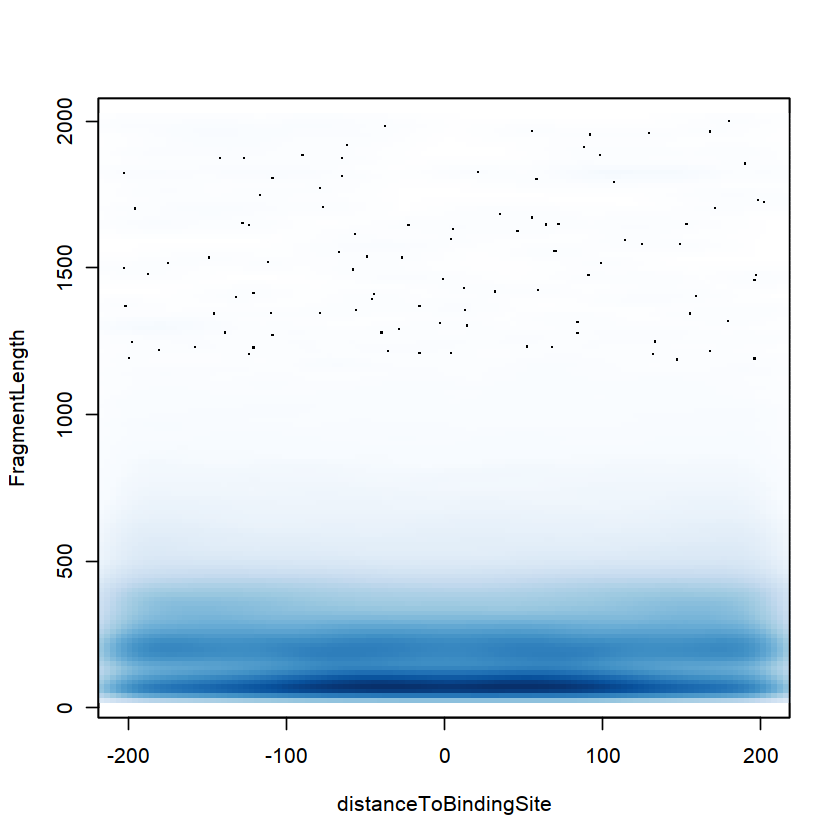

In [5]:
vPlot(c("/srv/scratch/surag/scATAC-reprog/bulk/D0_S1_L001_R1_001.merged.bam"),
     bindingSites=resize(ZEB_hits, 6, fix="center"), genome=BSgenome.Hsapiens.UCSC.hg38)

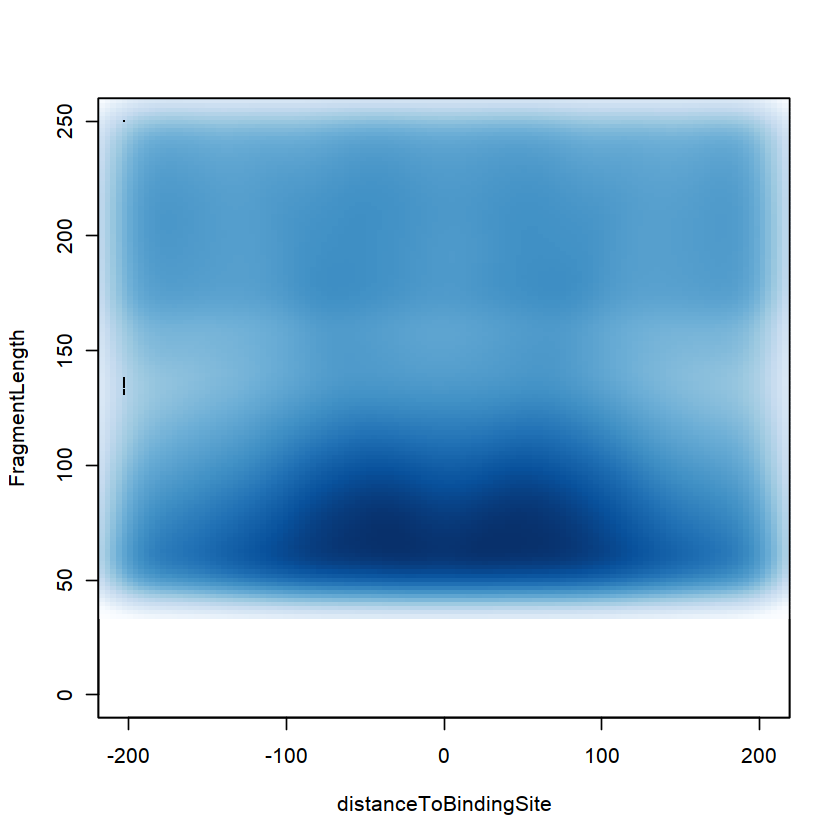

In [6]:
vPlot(c("/srv/scratch/surag/scATAC-reprog/bulk/D0_S1_L001_R1_001.merged.bam"),
     bindingSites=ZEB_hits, genome=BSgenome.Hsapiens.UCSC.hg38, ylim=c(0,250))

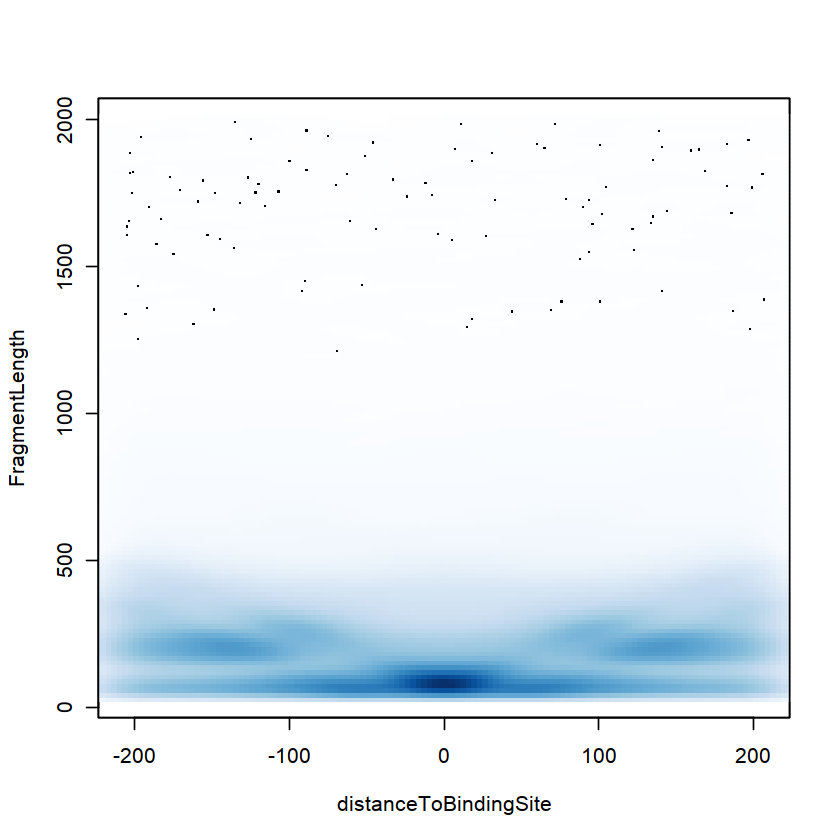

In [12]:
vPlot(c("/srv/scratch/surag/scATAC-reprog/bulk/D0_S1_L001_R1_001.merged.bam"),
     bindingSites=CTCF_hits, genome=BSgenome.Hsapiens.UCSC.hg38)

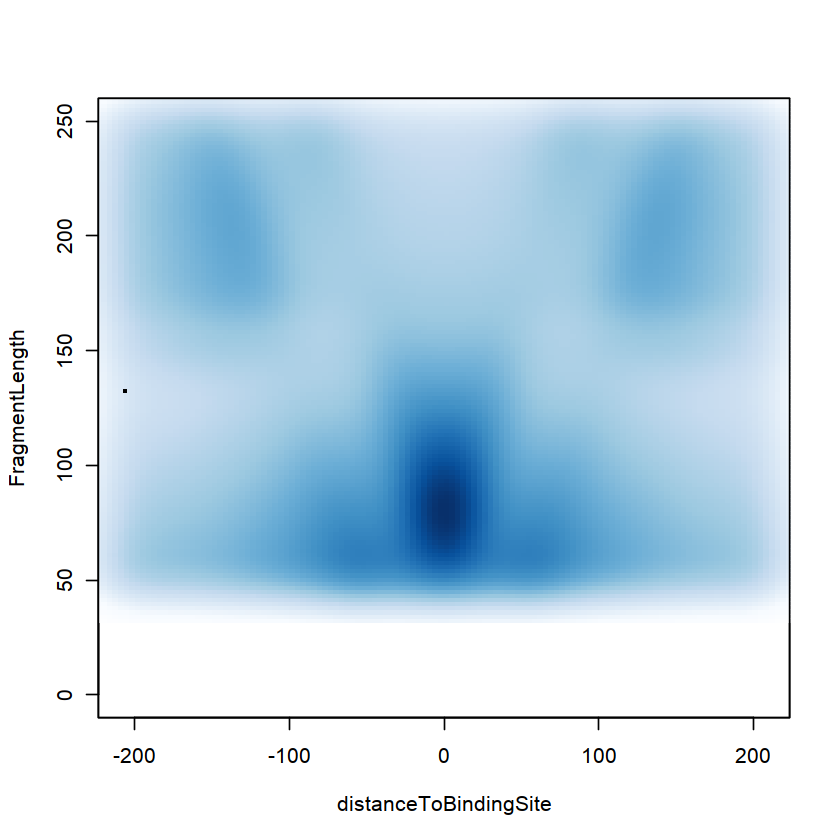

In [7]:
vPlot(c("/srv/scratch/surag/scATAC-reprog/bulk/D0_S1_L001_R1_001.merged.bam"),
     bindingSites=CTCF_hits, genome=BSgenome.Hsapiens.UCSC.hg38, ylim=c(0,250))

## Distance from Summit

In [13]:
ZEB_motifs = read.table("fibr.summit.int.SNAI.bed")[,1:6] # first 3 columns are peaks, next 3 are hits
colnames(ZEB_motifs) = c("chr", "start", "end", "chr", "motif_start", "motif_end")
ZEB_motifs$dist_to_summit = (ZEB_motifs$start + ZEB_motifs$end)/2 - (ZEB_motifs$motif_start+ZEB_motifs$motif_end)/2

ZEB_motifs$dist_to_summit[ZEB_motifs$dist_to_summit < -100] = -100
ZEB_motifs$dist_to_summit[ZEB_motifs$dist_to_summit > 100] = 100
head(ZEB_motifs)

,chr,start,end,chr,motif_start,motif_end,dist_to_summit
,<fct>,<int>,<int>,<fct>,<int>,<int>,<dbl>
1,chr1,100132612,100132812,chr1,100132772,100132778,-63
2,chr1,10032709,10032909,chr1,10032720,10032726,86
3,chr1,100539662,100539862,chr1,100539659,100539665,100
4,chr1,101150754,101150954,chr1,101150905,101150911,-54
5,chr1,1013593,1013793,chr1,1013591,1013597,99
6,chr1,10195719,10195919,chr1,10195721,10195727,95


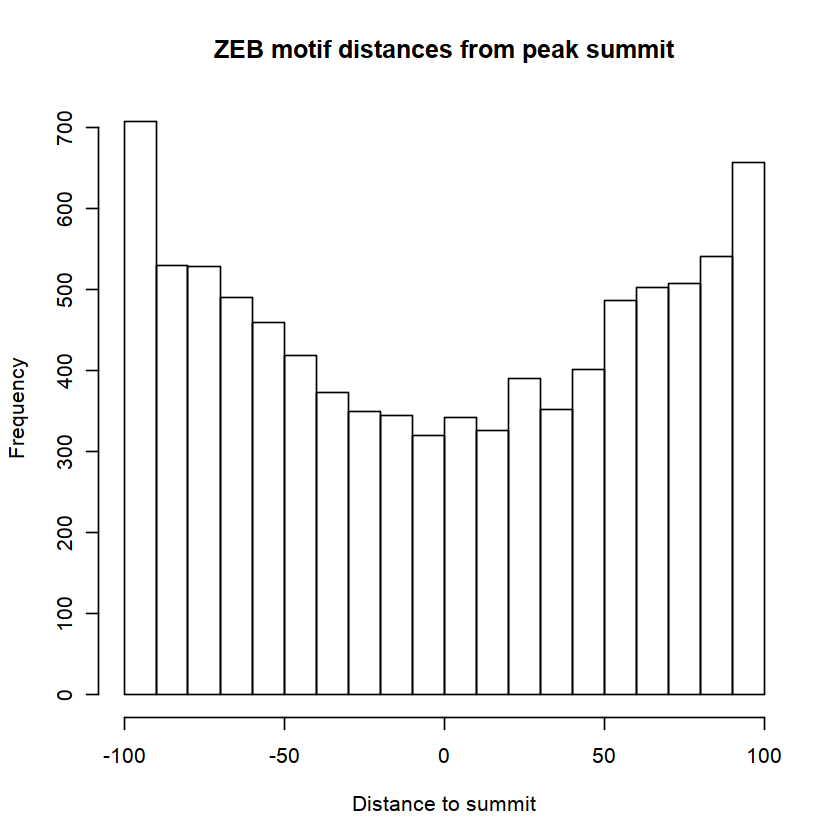

In [22]:
hist(ZEB_motifs$dist_to_summit, xlab='Distance to summit', main="ZEB motif distances from peak summit")

In [17]:
CTCF_motifs = read.table("fibr.summit.int.CTCF.bed")[,1:6] # first 3 columns are peaks, next 3 are hits
colnames(CTCF_motifs) = c("chr", "start", "end", "chr", "motif_start", "motif_end")
CTCF_motifs$dist_to_summit = (CTCF_motifs$start + CTCF_motifs$end)/2 - (CTCF_motifs$motif_start+CTCF_motifs$motif_end)/2

CTCF_motifs$dist_to_summit[CTCF_motifs$dist_to_summit < -100] = -100
CTCF_motifs$dist_to_summit[CTCF_motifs$dist_to_summit > 100] = 100
head(CTCF_motifs)

,chr,start,end,chr,motif_start,motif_end,dist_to_summit
,<fct>,<int>,<int>,<fct>,<int>,<int>,<dbl>
1,chr1,100266065,100266265,chr1,100266221,100266235,-63
2,chr1,10034533,10034733,chr1,10034582,10034596,44
3,chr1,100358299,100358499,chr1,100358376,100358390,16
4,chr1,100360818,100361018,chr1,100360958,100360972,-47
5,chr1,100606536,100606736,chr1,100606633,100606647,-4
6,chr1,100785578,100785778,chr1,100785725,100785739,-54


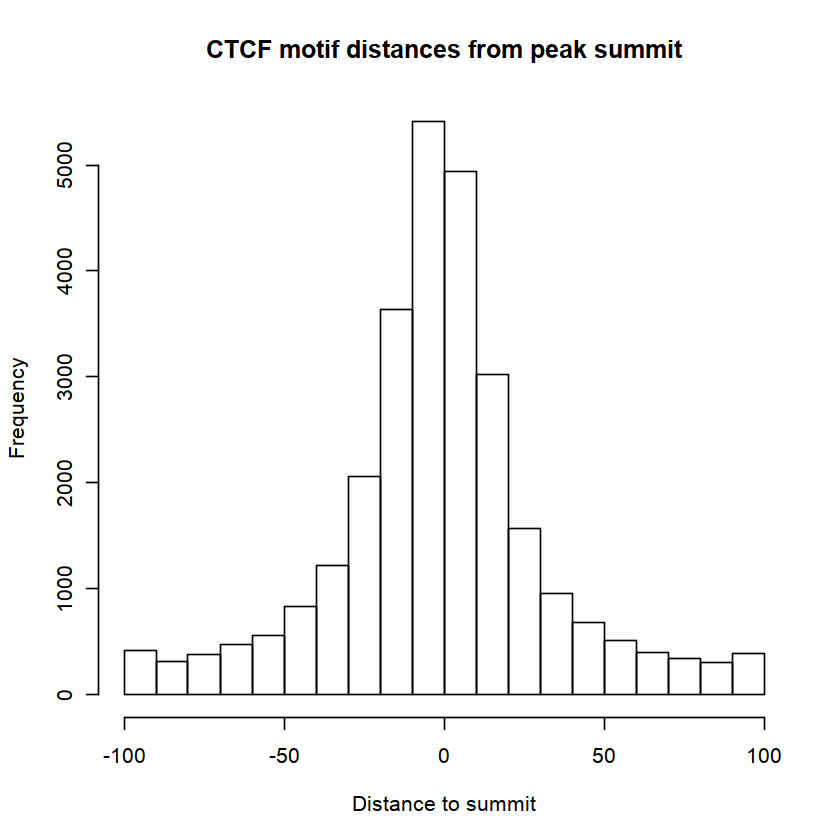

In [21]:
hist(CTCF_motifs$dist_to_summit, xlab = "Distance to summit", main="CTCF motif distances from peak summit")